# Honey Production

You may have heard, the honeybees are in a precarious state right now. You may have seen articles about the decline of the honeybee population for various reasons.

You want to investigate this decline and how the trends of the past predict the future for the honeybees.

## Step 1. Check out the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

df = pd.read_csv("https://s3.amazonaws.com/codecademy-content/programs/data-science-path/linear_regression/honeyproduction.csv")
print(df.head())

  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  


In [2]:
# get the mean of total production per year
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
print(prod_per_year)

    year     totalprod
0   1998  5.105093e+06
1   1999  4.706674e+06
2   2000  5.106000e+06
3   2001  4.221545e+06
4   2002  3.892386e+06
5   2003  4.122091e+06
6   2004  4.456805e+06
7   2005  4.243146e+06
8   2006  3.761902e+06
9   2007  3.600512e+06
10  2008  3.974927e+06
11  2009  3.626700e+06
12  2010  4.382350e+06
13  2011  3.680025e+06
14  2012  3.522675e+06


In [3]:
x = prod_per_year.year
x = x.values.reshape(-1, 1)
print(x)

[[1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]]


In [4]:
y = prod_per_year.totalprod
print(y)

0     5.105093e+06
1     4.706674e+06
2     5.106000e+06
3     4.221545e+06
4     3.892386e+06
5     4.122091e+06
6     4.456805e+06
7     4.243146e+06
8     3.761902e+06
9     3.600512e+06
10    3.974927e+06
11    3.626700e+06
12    4.382350e+06
13    3.680025e+06
14    3.522675e+06
Name: totalprod, dtype: float64


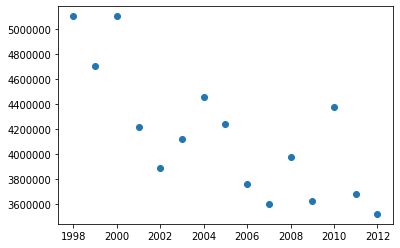

In [5]:
plt.scatter(x, y)
plt.show()

## Step 2. Create and Fit a Linear Regression Model


In [6]:
# create a linear regression model
regr = linear_model.LinearRegression()

# fit the model to the data
regr.fit(x, y)

# print out the slope of the line
print(regr.coef_[0])

# print out the intercept of the line
print(regr.intercept_)

-88303.18915238194
181208083.1073298


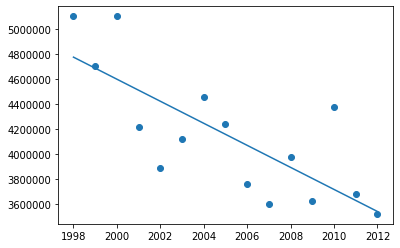

In [7]:
y_predict = regr.predict(x)

plt.scatter(x, y)
plt.plot(x, y_predict)
plt.show()

## Step 3. Predict the Honey Decline

So, it looks like the production of honey has been in decline, according to this linear model. 

Let's predict what the year 2050 may look like in terms of honey production. 

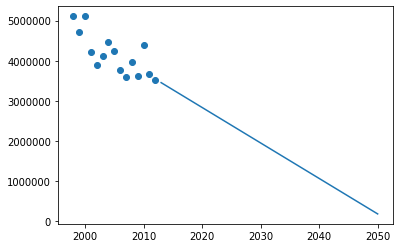

In [8]:
x_future = np.array(range(2013, 2051))
x_future = x_future.reshape(-1, 1)

future_predict = regr.predict(x_future)

plt.scatter(x, y)
plt.plot(x_future, future_predict)
plt.show()